

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i investigate data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 While i work with this dataframe i ask myself this questions?
 
What are most genres Movies ?

Which quarter are the best with the profit?

Who are the most cast representatives in this data?

Is there any correlation between vote average and profit ?

What are the most popular movies?

How popular movies are progressing with time from year to year?


In [117]:
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

import seaborn as sns
% matplotlib inline
sns.set()



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [118]:
#Load My data
df = pd.read_csv('tmdb-movies.csv')


In [119]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [120]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10530,10013,tt0091738,0.389778,18000000,41382841,Peggy Sue Got Married,Kathleen Turner|Nicolas Cage|Barry Miller|Cath...,NaN,Francis Ford Coppola,"Knowing what you know now, what would you do d...",...,Peggy Sue faints at a Highschool reunion. When...,103,Comedy|Drama|Fantasy|Romance,American Zoetrope|TriStar Pictures,10/5/86,57,5.7,1986,3.580932e+07,8.232729e+07
2654,855,tt0265086,1.735123,92000000,172989651,Black Hawk Down,Josh Hartnett|Ewan McGregor|Jason Isaacs|Tom S...,NaN,Ridley Scott,Leave No Man Behind.,...,When U.S. Rangers and an elite Delta Force tea...,144,Action|History|War,Jerry Bruckheimer Films|Revolution Studios|Sco...,12/28/01,1201,7.1,2001,1.132969e+08,2.130347e+08
2942,9381,tt0364970,1.064766,70000000,72108608,Babylon A.D.,Vin Diesel|Michelle Yeoh|MÃ©lanie Thierry|Lamb...,http://www.babylonadmovie.com/,Mathieu Kassovitz,Kill or be Killed.,...,In Babylon A.D Vin Diesel stars as a veteran-t...,101,Action|Adventure|Science Fiction|Thriller,StudioCanal|M6 Films|Canal+|CinÃ©CinÃ©ma|Babylon,8/20/08,436,5.4,2008,7.089506e+07,7.303063e+07
660,102651,tt1587310,3.582315,180000000,758410378,Maleficent,Angelina Jolie|Elle Fanning|Juno Temple|Sharlt...,http://movies.disney.com/maleficent,Robert Stromberg,Don't believe the fairy tale.,...,The untold story of Disney's most iconic villa...,97,Fantasy|Adventure|Action|Family|Romance,Walt Disney Pictures|Roth Films,5/28/14,2928,7.0,2014,1.657964e+08,6.985650e+08
5557,77987,tt1602613,0.890458,4800000,10337387,Only God Forgives,Ryan Gosling|Kristin Scott Thomas|Gordon Brown...,NaN,Nicolas Winding Refn,Time to Meet The Devil,...,"Julian, who runs a Thai boxing club as a front...",90,Drama|Thriller|Crime,Gaumont|Wild Bunch|Bold Films|Film i VÃ¤st|A G...,5/30/13,562,5.3,2013,4.492960e+06,9.676139e+06


In [121]:
df.shape

(10866, 21)

In [122]:
# get the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [123]:
#check for null value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [124]:
# get summry of my data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


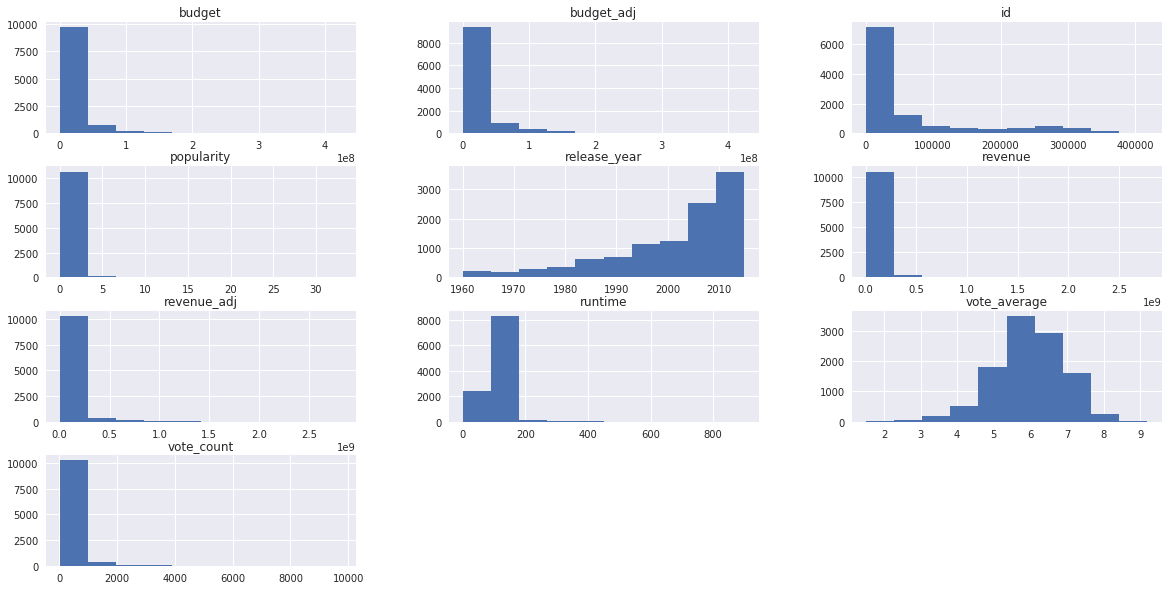

In [125]:
#this histogram data frame
df.hist(figsize=(20,10 ));

In [126]:
#unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [127]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [128]:
df.duplicated().sum()

1

In [129]:
vote_outliar = df.loc[(df.vote_average >= 9)]
vote_outliar

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


In [130]:
vote_count_outliar = df.loc[(df.vote_count < 100)]
vote_count_outliar.shape

(7537, 21)

In [131]:
def locc_zero(column):
    vv =df.loc[(df[column] <= 0)]
    return vv

In [132]:
locc_zero('budget_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [133]:
locc_zero('revenue_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


# Assess
1- Drop unnecessary columns (id,homepage,budget) i'll keep imdb_id in case i need to merge this dataset with another


2-  divided release_date to be four quarter per year (First quarter,Second quarter,....etc) to see effect of each quarter

3- Convert (release_year to be date type

5- drop vote_count under 100 votes i see it to low to minimize my data

6-Add profit column = revenue_adj - budget_adj


8 -drop Null values 

9 -Split genres,cast,keywords

 Replace 0 budget or 0 revenue with null value



# Data Cleaning 

In [134]:
# Make a copy of data to clean it
df_clean = df.copy()

In [135]:
df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [136]:
df_clean = df_clean.drop(columns=['id', 'budget','homepage'])


In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(10)
memory usage: 1.5+ MB


In [138]:
df_clean.dropna(inplace = True)

In [139]:
df_clean.isnull().sum()

imdb_id                 0
popularity              0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [140]:
df_clean['release_date'] =  pd.to_datetime(df_clean['release_date'])

In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 10865
Data columns (total 18 columns):
imdb_id                 7031 non-null object
popularity              7031 non-null float64
revenue                 7031 non-null int64
original_title          7031 non-null object
cast                    7031 non-null object
director                7031 non-null object
tagline                 7031 non-null object
keywords                7031 non-null object
overview                7031 non-null object
runtime                 7031 non-null int64
genres                  7031 non-null object
production_companies    7031 non-null object
release_date            7031 non-null datetime64[ns]
vote_count              7031 non-null int64
vote_average            7031 non-null float64
release_year            7031 non-null int64
budget_adj              7031 non-null float64
revenue_adj             7031 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(9)
memory usage: 1

In [142]:
df_clean.shape

(7031, 18)

In [143]:
df_clean['quarter'] = df_clean['release_date'].dt.quarter

In [144]:
df_clean.sample(4)

,imdb_id,popularity,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quarter
9170,tt0118539,0.108358,0,3 Ninjas: High Noon at Mega Mountain,Victor Wong|Mathew Botuchis|Hulk Hogan|Loni An...,Sean McNamara,Saving the day the ninja way!,hostage|hero|good vs evil|rivalry|crime,"Three young boys, Rocky, Colt and Tum Tum toge...",93,Action|Comedy|Family,TriStar Pictures|Leeds/Ben-Ami Productions|She...,1998-04-10,14,4.0,1998,0.0,0.0,2
7674,tt1065106,0.258705,0,Pigs,Jefferson Brown|Darryn Lucio|Christopher Ellio...,Karl DiPelino,26 girls. 26 letters in the alphabet. 1 campus...,brotherhood,A college ladies man accepts a challenge from ...,85,Comedy,Bad Monkey Productions|Hill's Production Services,2007-11-05,12,4.1,2007,0.0,0.0,4
6289,tt0380623,0.709751,0,The Perfect Man,Hilary Duff|Heather Locklear|Chris Noth|Mike O...,Mark Rosman,Is it all too good to be true?,mother|man-woman relation|singles|matchmaking|...,Holly is tired of moving every time her mom Je...,100,Comedy|Drama|Family|Romance,Universal Pictures,2005-06-17,118,5.7,2005,0.0,0.0,2
1707,tt1336006,0.310600,0,The Revenant,Chris Wylde|David Anders|Louise Griffiths|Jacy...,D. Kerry Prior,What could be worse than having your best frie...,police|vigilante|blood|gangster|revenant,A horror movie/buddy comedy about Joey and his...,110,Comedy|Horror,Putrefactory Limited|Wanko Toys,2009-08-16,30,5.5,2009,0.0,0.0,3


In [145]:
# Replace 0 budget or 0 revenue with null
df_clean.budget_adj.replace(0, np.nan, inplace=True)
df_clean.revenue_adj.replace(0, np.nan, inplace=True)

In [146]:
#check movies under 100 count of vote
vote_count_outliar = df_clean.loc[(df_clean.vote_count < 100)]
vote_count_outliar.shape

(3979, 19)

In [147]:
# drop under 100 count of vote
df_clean.drop(df_clean[df_clean.vote_count < 100].index, inplace=True)


In [148]:
# Replace 0 budget or 0 revenue with np.nan
df_clean.budget_adj.replace(0, np.nan, inplace=True)
df_clean.revenue_adj.replace(0, np.nan, inplace=True)

In [149]:
#function which will take any column as argument from and keep its track that's will be helpful
def data(column):
    #will take a column, and separate the string by '|'
    data = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #Sorting in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [150]:
#variable to store the returned value
genre_count = data('genres')
genre_count

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [151]:
cast_count = data('cast')
cast_count

Robert De Niro             72
Samuel L. Jackson          71
Bruce Willis               62
Nicolas Cage               61
Michael Caine              53
Robin Williams             51
John Cusack                50
Morgan Freeman             49
John Goodman               49
Liam Neeson                48
Susan Sarandon             48
Alec Baldwin               47
Julianne Moore             47
Johnny Depp                46
Gene Hackman               46
Christopher Walken         46
Tom Hanks                  46
Dennis Quaid               45
Willem Dafoe               45
Sylvester Stallone         45
Meryl Streep               44
Donald Sutherland          44
Clint Eastwood             44
Ed Harris                  44
Woody Harrelson            43
Antonio Banderas           43
Keanu Reeves               43
Robert Downey Jr.          43
Ewan McGregor              43
Anthony Hopkins            42
                           ..
Morgan Benoit               1
Oona Chaplin                1
Alejandra 

In [152]:
#function which will take any column as argument from and keep its track that's will be helpful
def data_split(column):
    #will take a column, and separate the string by '|'
    data_split = df[column].str.cat(sep = ' ')
    
    #giving pandas series and storing the values separately
    data_split = pd.Series(data_split.split(' '))
        
    return data_split

In [153]:
over = data_split('original_title')
over.head()

0    Jurassic
1       World
2         Mad
3        Max:
4        Fury
dtype: object

In [154]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    stop_words.update(('The','2','A','&','2:','  '))
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

over = over.apply(lambda x: remove_stopwords(x))

In [155]:
tag_clean= over.value_counts(ascending = False)

In [156]:
tag_clean.head(20)

             6198
Man           145
I              98
Love           96
Dead           95
Movie          91
My             81
Night          80
Me             79
Last           76
In             73
You            71
Life           70
Time           67
Day            67
Little         66
All            64
II             64
House          63
Christmas      63
dtype: int64

In [157]:
tag_clean_most = tag_clean.head(10)

In [158]:
def avg_func(column_name) :
    return df[column_name].mean()

In [159]:
avg_func('vote_count')

217.38974783729063

In [160]:
df_clean['profit'] = df_clean['revenue_adj'] - df_clean['budget_adj']

In [161]:
df_clean.sample()

,imdb_id,popularity,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quarter,profit
5548,tt1291580,0.934716,15600000,Behind the Candelabra,Michael Douglas|Matt Damon|Rob Lowe|Dan Aykroy...,Steven Soderbergh,Too much of a good thing is wonderful,based on novel|celebrity|based on true story|g...,"Based on the autobiographical novel, the tempe...",118,Drama|Romance,HBO Films,2013-05-26,209,6.6,2013,2.152877e+07,1.460212e+07,2,-6.926647e+06


In [162]:
df_clean['profit_percentage'] = (df_clean['revenue_adj'] -  df_clean['budget_adj']) / df_clean['budget_adj'] * 100


In [163]:
df_clean.sample(5)

,imdb_id,popularity,revenue,original_title,cast,director,tagline,keywords,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quarter,profit,profit_percentage
2058,tt1226753,0.670027,45636368,The Debt,Helen Mirren|Sam Worthington|Jessica Chastain|...,John Madden,The secret is only the beginning,beach|mossad|secret agent|insane asylum|lye,Rachel Singer is a former Mossad agent who tri...,113,...,Miramax Films|Marv Films|Pioneer Pictures,2010-04-11,147,6.1,2010,2.000000e+07,4.563637e+07,2,2.563637e+07,128.181840
9084,tt0120694,0.388858,55041738,Halloween: H20,Jamie Lee Curtis|Josh Hartnett|Adam Arkin|Mich...,Steve Miner,Blood is thicker than Water.,california|new identity|halloween|witness prot...,Two decades after surviving a massacre on Octo...,86,...,Dimension Films,1998-08-05,142,5.7,1998,2.274082e+07,7.362908e+07,3,5.088826e+07,223.774929
8247,tt0104714,1.574949,321731527,Lethal Weapon 3,Mel Gibson|Danny Glover|Joe Pesci|Rene Russo|S...,Richard Donner,The magic is back again!,rookie cop|dog biscuit|shooting practice|sitti...,Archetypal buddy cops Riggs and Murtaugh are b...,118,...,Silver Pictures|Warner Bros.,1992-05-15,468,6.1,1992,5.439085e+07,4.999786e+08,2,4.455877e+08,819.232934
876,tt2962726,0.550453,0,The Anomaly,Ian Somerhalder|Alexis Knapp|Noel Clarke|Luke ...,Noel Clarke,"If you only had 09 minutes 47 seconds, What wo...",technology|future|mind control|kidnapping|cons...,A former soldier is taken captive and awakens ...,97,...,Unstoppable Entertainment|thefyzz|Tea Shop & F...,2014-06-19,104,4.7,2014,NaN,NaN,2,NaN,NaN
5598,tt2016940,0.707968,2054941,Man of Tai Chi,Keanu Reeves|Tiger Hu Chen|Jeremy Marinas|Stev...,Keanu Reeves,No Rules. No Mercy. Pure Fighting.,china|martial arts|tai chi|extortion|illegal m...,"In Beijing, a young martial artist's skill pla...",105,...,Universal Pictures|Village Roadshow Pictures|C...,2013-07-04,193,5.6,2013,2.340083e+07,1.923493e+06,3,-2.147734e+07,-91.780236


# Exploratory Data Analysis


## What are most genres Movies ?


In [164]:
genre_count

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

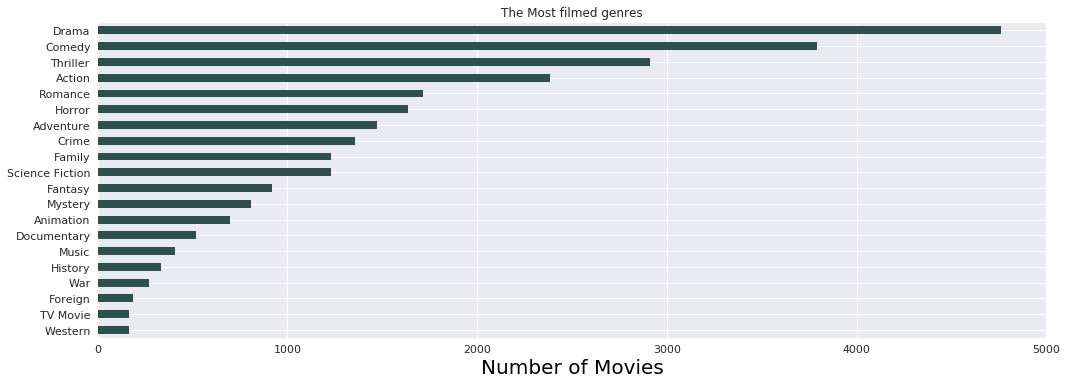

In [165]:
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#2F4F4F', fontsize = 11)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'k', fontsize = '20')

#giving the figure size(width, height)
ax.figure.set_size_inches(17, 5.8)

#shwoing the plot
plt.show()
plt.show()





## Most genres movies are Drama (4761),Comedy (3793),Thriller(2908) and the least Western(165)

 ## Who are the most cast representatives in this data

In [166]:
cast_count.head(3)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
dtype: int64

## Robert De Niro,Samuel L. Jackson, and Bruce Willis most three cast representatives in this data

## Which quarter are the best with the profit?

In [167]:
M_Quarter = df_clean.groupby('quarter')['profit'].sum()



In [168]:
M_Quarter #.value_counts(ascending = False)

quarter
1    4.504434e+10
2    1.126264e+11
3    7.039300e+10
4    1.118505e+11
Name: profit, dtype: float64

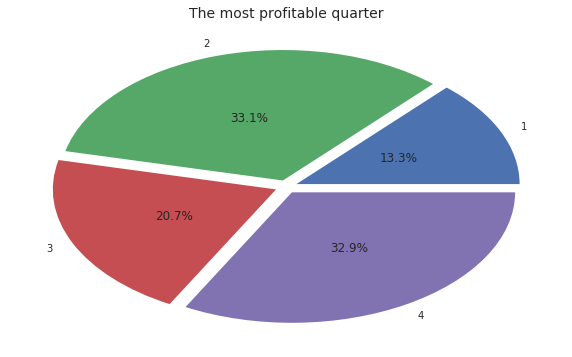

In [169]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = M_Quarter.keys()
plt.pie(x=M_Quarter, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("The most profitable quarter", fontsize=14);
pie.savefig("The most profitable quarter.png")

## The second quarter of the year is the most profitable throughout the year at a rate of 33.1% of the total profits for the year, but we will find that the fourth quarter is also very close to it with a percentage of 32.9% while the least worthy is the first quarter of the year! At a rate of 13.3%

## Is there any correlation between vote average and profit ?

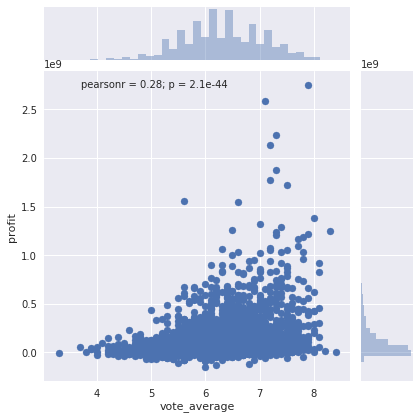

In [170]:

sns.jointplot(data=df_clean, x = 'vote_average', y = 'profit');


## Yes there are strong positive realtionship between profit and vote average

## Here in this table you can the correlation between different values

In [171]:
cormat = df_clean.corr()
round(cormat,2)

,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,quarter,profit,profit_percentage
popularity,1.00,0.58,0.20,0.75,0.28,0.11,0.34,0.49,0.02,0.47,-0.01
revenue,0.58,1.00,0.25,0.73,0.18,0.06,0.65,0.89,0.02,0.84,-0.00
runtime,0.20,0.25,1.00,0.26,0.29,-0.11,0.33,0.27,0.11,0.26,0.00
vote_count,0.75,0.73,0.26,1.00,0.37,0.15,0.47,0.62,-0.00,0.57,-0.01
vote_average,0.28,0.18,0.29,0.37,1.00,-0.22,-0.03,0.23,0.11,0.28,-0.01
release_year,0.11,0.06,-0.11,0.15,-0.22,1.00,0.07,-0.19,-0.10,-0.22,-0.03
budget_adj,0.34,0.65,0.33,0.47,-0.03,0.07,1.00,0.54,0.04,0.38,-0.02
revenue_adj,0.49,0.89,0.27,0.62,0.23,-0.19,0.54,1.00,0.04,0.98,0.00
quarter,0.02,0.02,0.11,-0.00,0.11,-0.10,0.04,0.04,1.00,0.03,-0.01
profit,0.47,0.84,0.26,0.57,0.28,-0.22,0.38,0.98,0.03,1.00,0.01


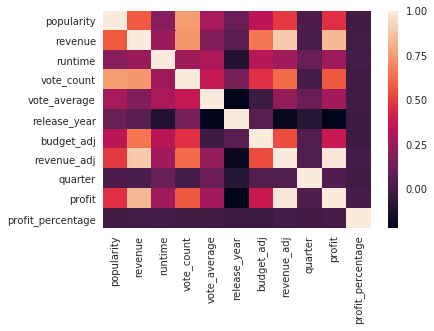

In [172]:
sns.heatmap(cormat);


## What are the most popular movies ?

In [173]:
top_popular = df_clean.sort_values('popularity', ascending=False).head(3)
top_popular['original_title']

0          Jurassic World
1      Mad Max: Fury Road
629          Interstellar
Name: original_title, dtype: object

## The most popular movies are: Jurassic World, Mad Max: Fury Road, Interstellar

## How popular movies are progressing with time from year to year ?

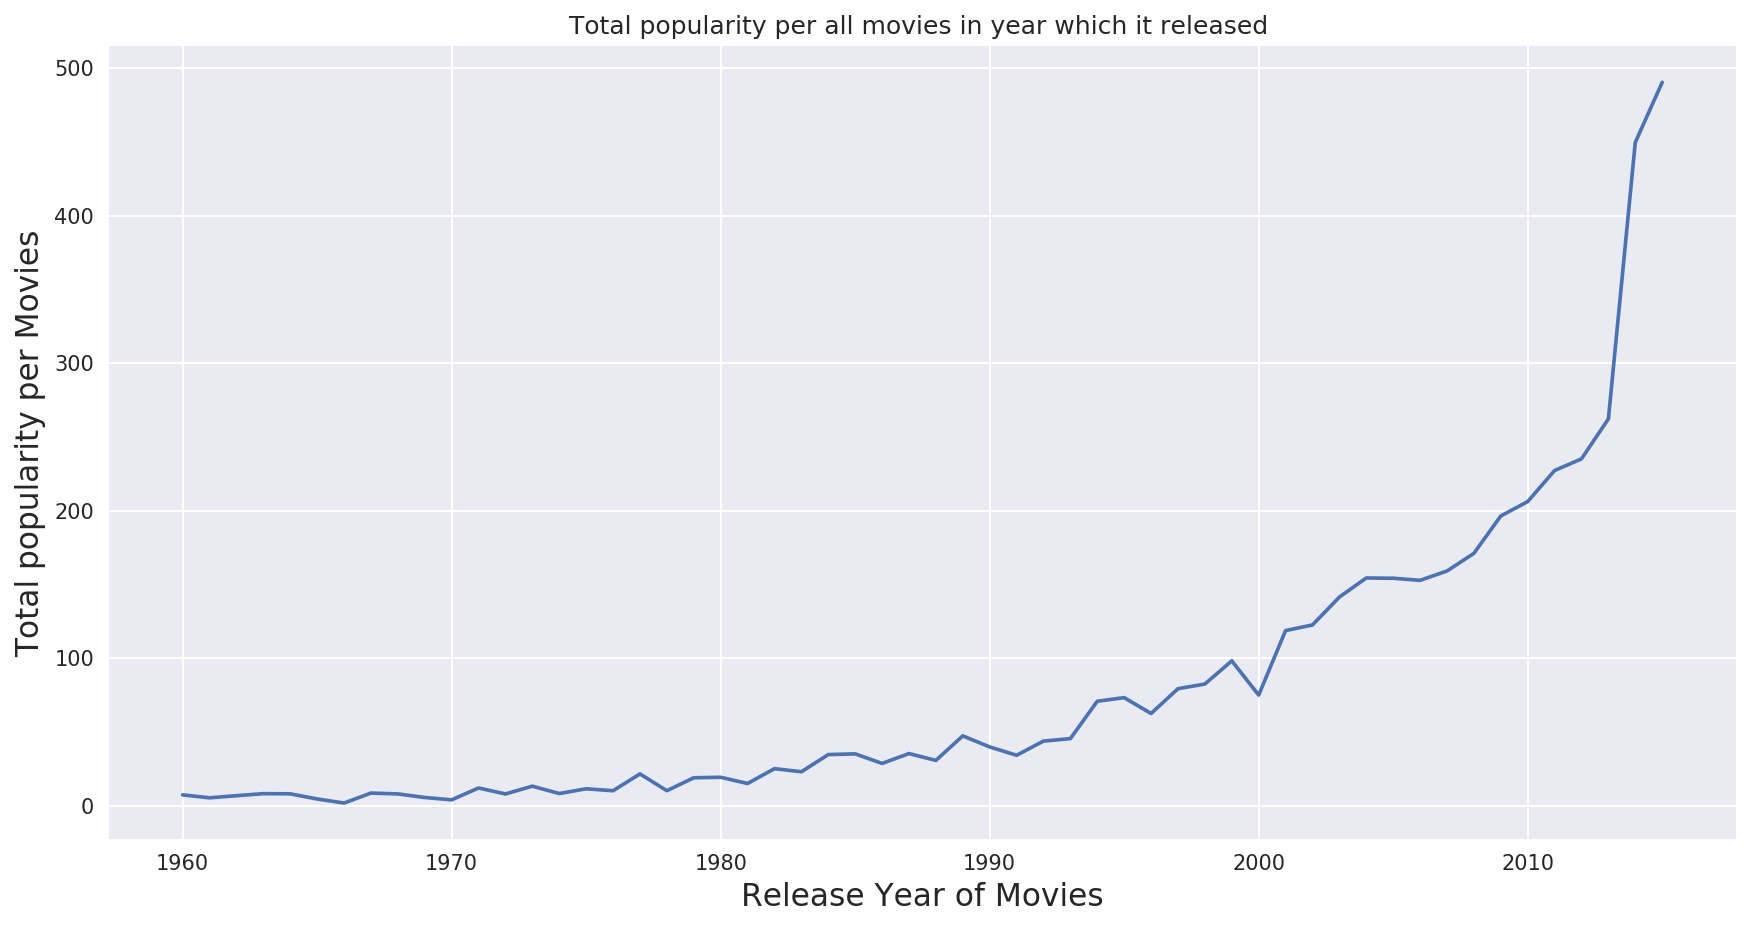

In [174]:
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years 
profits_each_year = df_clean.groupby('release_year')['popularity'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(14,7), dpi = 150)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 15)
#labeling y-axis
plt.ylabel('Total popularity per Movies', fontsize = 15)
#title of a the plot
plt.title('Total popularity per all movies in year which it released ')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()


## We also see the popularity of the films progressing very strongly, especially after 2000

<a id='conclusions'></a>
## Conclusions
### Findings:
After i work with this i can say most movies on the market are are Drama (4761),Comedy (3793),Thriller(2908) and the least Western(165).

if i decide to make movie go out to people i will choose second quarter or fourth quarter of a year because they have the most profit with ( 33.1%,32.9%) and of course, I will think a lot before I choose the first quarter of the year(13.3%) because it seems not preferable.

There are strong positive realtionship between profit and vote average

Robert De Niro,Samuel L. Jackson, and Bruce Willis most three cast representatives in this data.

We also see the popularity of the films progressing very strongly, especially after 2000.

### Limitations:
I found there are 0 revenue and budjet with movies and the run time with some movies so long.



In [175]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0